In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ1A/"
%ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/JKJ1A
backyard/  model/     src/      src_day1/      src_day2_ans/
data/      notebook/  src_ans/  src_day1_ans/


In [ ]:
# モジュールのインポート
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt 

import sys
sys.path.append('src_ans')  # src_day1にあるコードを利用できるようにする

from vgg import VGG
from cifar10 import load_data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import torchvision
# 画像を表示するための関数
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (10,5))  # 横幅, 縦幅
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 複数の画像を並べて表示する関数
def imshow_list(images): 
    imshow(torchvision.utils.make_grid(images))

In [ ]:
from pathlib import Path

from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image


class JKJ1Adataset(Dataset):
    IMG_EXTENSIONS = [".jpg", ".jpeg", ".png", ".bmp"]

    def __init__(self, img_dir='data/JKJ1A-dataset/raw', size=32):
        # 画像ファイルのパス一覧を取得する。
        self.img_paths = self._get_img_paths(img_dir)
        self.transform = transforms.Compose( 
            [transforms.Resize(size), 
             transforms.ToTensor(),
            #  transforms.Normalize((0.5739, 0.4777, 0.3544), (0.2401*2, 0.2083*2, 0.2232*2))
             ] # original size is 256 x 256
            )

    def __getitem__(self, index):
        path = self.img_paths[index]

        # 画像を読み込む。
        img = Image.open(path)

        if self.transform is not None:
            # 前処理がある場合は行う。
            img = self.transform(img)

        return img

    def _get_img_paths(self, img_dir):
        """指定したディレクトリ内の画像ファイルのパス一覧を取得する。
        """
        img_dir = Path(img_dir)
        img_paths = [
            p for p in img_dir.iterdir() if p.suffix in self.IMG_EXTENSIONS
        ]

        return img_paths

    def __len__(self):
        """ディレクトリ内の画像ファイルの数を返す。
        """
        return len(self.img_paths)


# # Transform を作成する。
# transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
# # Dataset を作成する。
# # dataset = ImageFolder("data/JKJ1A-dataset/raw", transform)
dataset = JKJ1Adataset()
# DataLoader を作成する。
dataloader = DataLoader(dataset, batch_size=128)

# for batch in dataloader:
#     print(batch.shape)

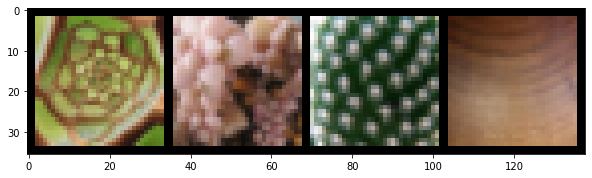

In [ ]:
images = iter(dataloader).next()
imshow_list(images[:4])

In [ ]:
from vgg import VGG as Net

PATH = './model/model_cifar10.pth'
net = Net('VGG11')                   # 空のネットワークを準備
net.eval()                           # 評価モードにする
state_dict = torch.load(PATH)        # 保存したパラメタをロード
net.load_state_dict(state_dict)      # ネットワークにパラメタをセット

<All keys matched successfully>

In [ ]:
from vgg import VGG as Net

# PATH = './model/model_cifar10.pth'
PATH = './model/advmodel_cifar10_0.01_fgsm_Linf.pth'
net_adv = Net('VGG11')                   # 空のネットワークを準備
net_adv.eval()                           # 評価モードにする
state_dict = torch.load(PATH)        # 保存したパラメタをロード
net_adv.load_state_dict(state_dict)      # ネットワークにパラメタをセット

<All keys matched successfully>

In [ ]:
pred = net(images).argmax(dim=-1)
pred

tensor([1, 1, 4, 1, 1, 4, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 4, 1, 0, 0, 0, 0, 2, 1,
        1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 1, 2, 4,
        1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1,
        4, 2, 0, 0, 2, 2, 4, 1, 0, 1, 1, 2, 1, 0, 2, 4, 0, 1, 1, 0, 1, 1, 2, 1,
        3, 1, 2, 0, 0, 0, 4, 4, 4, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 3, 1,
        0, 0, 2, 4, 0, 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


class 0


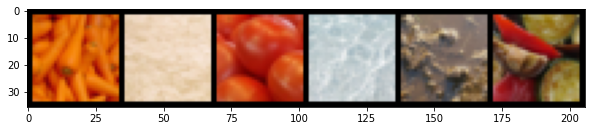

class 2


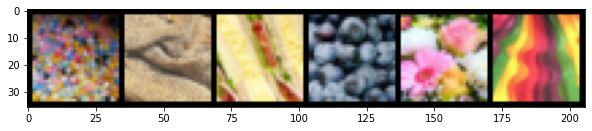

class 3


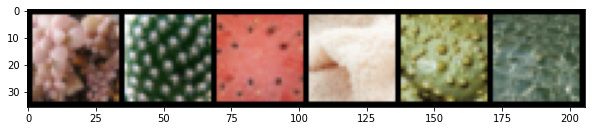

class 4


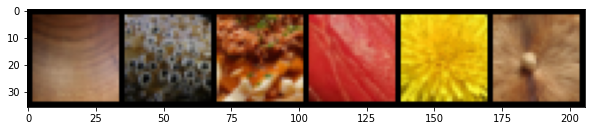

class 5


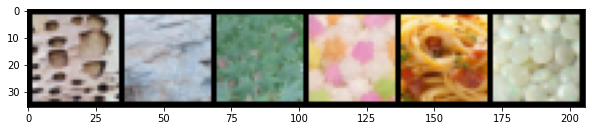

class 6


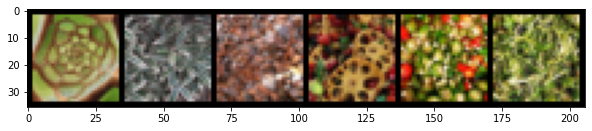

In [ ]:
pred = net(images).argmax(dim=-1)
for i in range(10):
    if (pred==i).sum() >= 6:
        print(f'class {i}')
        imshow_list(images[pred==i][:6])

class 0


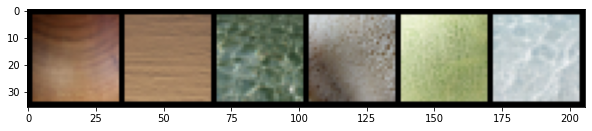

class 1


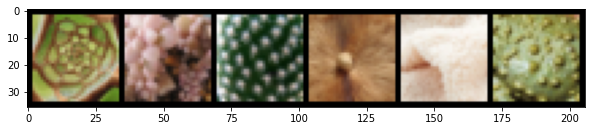

class 2


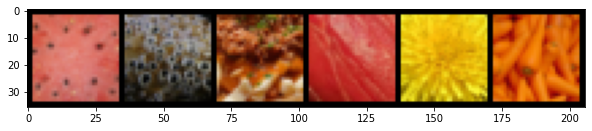

In [ ]:
pred = net_adv(images).argmax(dim=-1)
for i in range(10):
    if (pred==i).sum() >= 6:
        print(f'class {i}')
        imshow_list(images[pred==i][:6])

---
# 概要

Day1, Day2でPythonおよびPytorchにある程度慣れ親しんだと思います．これまではCIFAR10やMNISTといった標準的なデータセットを利用しました．今回から最終レポートに向けて，初日に自分たちで収集したデータセットで分類を行ってもらいます．仮にJKJA1データセットと呼びます．



---
## 実験課題１

VGGモデルでJKJA1データセットを学習し，クロスエントロピーロスを計算せよ．様々なパラメータを試し，なるべく結果が良くなるようなものを見つけよ．

## 実験課題２

CIFAR10で学習済みのモデル`model_cifar10.pth`を読み込み，それを引き続き学習させる形でJKJA1データセットを学習し，クロスエントロピーロスを計算せよ．実験課題２での結果と比較せよ．

## 実験課題３

# 実験課題４
Day2の課題３のように極端な敵対的画像を生成してみよ．